# References
## 
* 

# Parameters adjusted

# Considerations
* For now, I am using a gamma order of 10, but Williams and Baker (2009) used gaussians for their inputs.
* I added the independent noise input (which acted on the dendritic compartment) on the configuration file. Here I only change some of its parameters.
* Because Renshaw cell effects on motoneurons are inhibitory, I can separate cortical to interneuron input according to their nature. In this case, just using excitatory sinpses will do.
* Right now, I could not obtain the flat input.

In [4]:
import sys
sys.path.insert(0, '../../..')
import time
from scipy import signal
from scipy.fftpack import fft

import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

from Configuration import Configuration
from MotorUnitPoolOpt import MotorUnitPool
from InterneuronPoolOpt import InterneuronPool
from NeuralTract import NeuralTract
from SynapsesFactory import SynapsesFactory

In [75]:
def simulator(numberCM, numberS, numberFR, numberFF, numberRC, Parametrization, MNRCdecay, RCMNdecay, posMN, posRC, FFConductanceStrength):

    conf = Configuration('../../confuchiyama.rmto')
    
    # Number of cells
    idx = np.where(conf.confArray['f0']=='Number_CMExt')[0][0]
    conf.confArray['f1'][idx] = numberCM
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-S')[0][0]
    conf.confArray['f1'][idx] = numberS
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-FR')[0][0]
    conf.confArray['f1'][idx] = numberFR
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-FF')[0][0]
    conf.confArray['f1'][idx] = numberFF
    idx = np.where(conf.confArray['f0']=='Number_RC_ext')[0][0]
    conf.confArray['f1'][idx] = numberRC
    
    # Duration of simulation
    conf.simDuration_ms = 1000
    
    if Parametrization == 'old':
        from SynapsesFactory import SynapsesFactory
        # Parameters from java
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.3
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.24
        idx = np.where(conf.confArray['f0']=='gmax:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.17
        idx = np.where(conf.confArray['f0']=='gmax:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.3

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 64.77885
        conf.confArray['f2'][idx] = 64.77885
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 285
        conf.confArray['f2'][idx] = 285
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 200
        conf.confArray['f2'][idx] = 200
        
    elif Parametrization == 'new':
        from SynapsesFactory import SynapsesFactory
        # Parameters from Python
        ## Threshold (makes a rheobase of 1.25-3.75 nA)
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 5
        conf.confArray['f2'][idx] = 15
        
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 25
        conf.confArray['f2'][idx] = 25
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 242
        conf.confArray['f2'][idx] = 242
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 760
        conf.confArray['f2'][idx] = 760
        
    elif Parametrization == 'final':
        from SynapsesFactoryRenshaw import SynapsesFactory
        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.130
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.119
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.081
        idx = np.where(conf.confArray['f0']=='gmax:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = FFConductanceStrength/2.2
        idx = np.where(conf.confArray['f0']=='gmax:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = FFConductanceStrength/1.8
        idx = np.where(conf.confArray['f0']=='gmax:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = FFConductanceStrength
        
        # Threshold
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 18.9089
        conf.confArray['f2'][idx] = 18.9089

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 27
        conf.confArray['f2'][idx] = 27
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 218.2168
        conf.confArray['f2'][idx] = 218.2168
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 7000
        conf.confArray['f2'][idx] = 7000

        # Ks
        idx = np.where(conf.confArray['f0']=='gmax_Kf:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 3300
        idx = np.where(conf.confArray['f0']=='gmax_Ks:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 2300000
        idx = np.where(conf.confArray['f0']=='beta_q:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.02
        idx = np.where(conf.confArray['f0']=='alpha_q:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.004
        idx = np.where(conf.confArray['f0']=='alpha_n:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='beta_n:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.5
        
        ## Connectivity, set to ensure neurons are connected properly
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        
        # Decay factors
        idx = np.where(conf.confArray['f0']=='dec:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
        
        # Columnar length
        idx = np.where(conf.confArray['f0']=='position:MG-')[0][0]
        conf.confArray['f1'][idx] = 0
        conf.confArray['f2'][idx] = posMN
        idx = np.where(conf.confArray['f0']=='position:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 0
        conf.confArray['f2'][idx] = posRC
        
    # Dynamics of MN-RC synapse
    idx = np.where(conf.confArray['f0']=='dyn:MG-S>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = None
    idx = np.where(conf.confArray['f0']=='dyn:MG-FR>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = None
    idx = np.where(conf.confArray['f0']=='dyn:MG-FF>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = None
    
    # Connectivity of independent noise
    idx = np.where(conf.confArray['f0']=='Con:Noise>MG-@dendrite|excitatory')[0][0]
    conf.confArray['f1'][idx] = 100
    idx = np.where(conf.confArray['f0']=='NoiseGammaOrder_MG')[0][0]
    conf.confArray['f1'][idx] = 7
    idx = np.where(conf.confArray['f0']=='NoiseTarget_MG')[0][0]
    conf.confArray['f1'][idx] = 'FR'
    idx = np.where(conf.confArray['f0']=='NoiseFunction_MG')[0][0]
    conf.confArray['f1'][idx] = '100 + 0*t'
    idx = np.where(conf.confArray['f0']=='gmax:Noise>MG-@dendrite|excitatory')[0][0]
    conf.confArray['f1'][idx] = 25
    
    # Descending commands
    idx = np.where(conf.confArray['f0']=='Con:CMExt->MG-S@dendrite|excitatory')[0][0]
    conf.confArray['f1'][idx] = 30
    idx = np.where(conf.confArray['f0']=='Con:CMExt->MG-FR@dendrite|excitatory')[0][0]
    conf.confArray['f1'][idx] = 30
    idx = np.where(conf.confArray['f0']=='Con:CMExt->MG-FF@dendrite|excitatory')[0][0]
    conf.confArray['f1'][idx] = 30
    idx = np.where(conf.confArray['f0']=='gmax:CMExt->MG-S@dendrite|excitatory')[0][0]
    conf.confArray['f1'][idx] = 0.6
    idx = np.where(conf.confArray['f0']=='gmax:CMExt->MG-FR@dendrite|excitatory')[0][0]
    conf.confArray['f1'][idx] = 0.6
    idx = np.where(conf.confArray['f0']=='gmax:CMExt->MG-FF@dendrite|excitatory')[0][0]
    conf.confArray['f1'][idx] = 0.6

    pools = dict()
    pools[0] = MotorUnitPool(conf, 'MG')
    pools[1] = NeuralTract(conf, 'CMExt')
    pools[2] = InterneuronPool(conf, 'RC', 'ext')

    Syn = SynapsesFactory(conf, pools)

    GammaOrder = 7 # Gamma process of order 1 is equivalent to Poisson process
    FR = 15#50#70
    
    t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

    RC_mV = np.zeros_like(t)
    MN_mV = np.zeros_like(t)
    inhNetSynCond = np.zeros_like(t)
    excNetSynCond = np.zeros_like(t)

    for i in xrange(0, len(t)):
        pools[1].atualizePool(t[i],FR, GammaOrder)
        pools[3].atualizePool(t[i]) # synaptic Noise
        pools[4].atualizePool(t[i]) # synaptic Noise
        pools[0].atualizeMotorUnitPool(t[i]) # MN pool
        pools[2].atualizeInterneuronPool(t[i]) # RC pool
        RC_mV[i] = pools[2].v_mV[0]
        MN_mV[i] = pools[0].v_mV[2*(0)+1]
        inhNetSynCond[i] = pools[0].unit[0].compartment[0].SynapsesIn[1].computeConductance(t[i])
        excNetSynCond[i] = pools[0].unit[0].compartment[0].SynapsesIn[0].computeConductance(t[i])
#         import pdb; pdb.set_trace()
#         pools[1].unit[0].transmitSpikesThroughSynapses[0].computeConductance(t[i])
        
    pools[0].listSpikes()
    pools[1].listSpikes()
    pools[0].getMotorUnitPoolEMG()
    
    ISI = np.array([])
    for i in xrange(0,len(pools[0].unit)):
        ISI = np.append(ISI, np.diff(np.reshape(np.array(pools[0].unit[i].terminalSpikeTrain), (-1,2))[:,0]))
    plt.figure()
    plt.hist(ISI)
    plt.title('CSI ISI distribution')
    plt.show()
    
    instantaneousFiring = [np.empty((0,1), dtype=float)]
    RCSpikeInstants = pools[0].poolSomaSpikes[pools[0].poolSomaSpikes[:,1]==0, 0]
    if not any(RCSpikeInstants):
        print "No spikes for first MN"
    elif len(RCSpikeInstants)==1:
        print "Length 1..."
    else:
        for i in range(len(RCSpikeInstants)-1):
            instantaneousFiring = np.append(instantaneousFiring, 
               [1000/(RCSpikeInstants[i+1]-RCSpikeInstants[i])])
        plt.figure()
        plt.plot(instantaneousFiring, '.')
        plt.title('Instantaneous firing rate')
        plt.show()
    
    fs=1/(conf.timeStep_ms*1e-3)
    window = 2048

#     plt.figure()
#     plt.plot(pools[0].emg)
#     plt.show()
#     plt.figure()
#     plt.plot(pools[1].poolTerminalSpikes[:, 0], pools[1].poolTerminalSpikes[:, 1]+1, '.')
#     plt.show()

#     emg = [x[0] for x in pools[0].emg]
#     spikes = pools[1].poolTerminalSpikes[:, 0].tolist()
#     f1, Cxy = signal.coherence(emg, spikes, fs, nperseg=window)
    muscleForce = [x[0] for x in pools[0].Muscle.force]
    
    plt.figure()
    plt.plot(t, muscleForce)
    plt.title('Force')
    plt.xlabel('t (ms)')
    plt.ylabel('Force (N?)')
    
    staticForce = [y for x,y in enumerate(muscleForce) if t[x]>500]
    f2, Pxx = signal.welch(signal.detrend(staticForce), fs, nperseg=window)

#     plt.figure()
#     plt.plot(f1, Cxy)
#     plt.xlabel('f (Hz)')
#     plt.ylabel('Coherence')
#     plt.xlim((0, 500))
    
    plt.figure()
    plt.plot(f2, Pxx)
    plt.title('Force PSD')
    plt.xlabel('f (Hz)')
    plt.ylabel('Power Spectrum')
#     plt.xlim((0, 500))

    f2, Pxx = signal.welch(signal.detrend(excNetSynCond), fs, nperseg=window)
    plt.figure()
    plt.plot(f2, Pxx)
    plt.title('input PSD')
    plt.xlabel('f (Hz)')
    plt.ylabel('Power Spectrum')
    
    plt.figure()
    plt.plot(t, MN_mV)
    plt.title('MN membrane potential')
    plt.show()
    
    plt.figure()
    plt.plot(t, RC_mV)
    plt.title('RC membrane potential')
    plt.show()
    
    plt.figure()
    plt.plot(pools[1].poolTerminalSpikes[:, 0],
         pools[1].poolTerminalSpikes[:, 1]+1, '.')
    plt.title('Neural tract spikes')
    plt.show()
    
    plt.figure()
    plt.plot(t, excNetSynCond)
    plt.title('Excitatory conductances')
    plt.show()
    print "Mean conductance "+str(np.mean(excNetSynCond))
    
    plt.figure()
    plt.plot(t, inhNetSynCond)
    plt.title('Inhibitory conductances')
    plt.show()
    
# SD = np.std(ISI)
# M = np.mean(ISI)
# SK = scipy.stats.skew(ISI)
# CV = SD / M

# print 'ISI Mean = ' + str(M) + ' ms'
# print 'ISI Standard deviation = ' + str(SD) + ' ms'
# print 'ISI CV = ' + str(CV)
# M_FR = 1000.0 / M
# SD_FR = np.sqrt((SD**2) * 1000 / (M**3) + 1/6.0 + (SD**4) / (2*M**4) - SK/(3*M**3))


# print 'Firing rate mean = ' + str(M_FR) + ' Hz'
# print 'Firing rate standard deviation = ' + str(SD_FR) + ' Hz'
# CV_FR = SD_FR / M_FR
# print 'CV of Firing rate = ' + str(CV_FR)

In [76]:
nCM = 400
nS = 75
nFR = 75
nFF = 150
nRC = 300
params = 'final'
declinefactor_MN = 1/6.0
declinefactor_RC = 3.5/3
MNposition = 7
RCposition = 7
gmaxFF = 0.3

Muscle spindle from muscle MG built.
Motor Unit Pool MG built
Descending Command CMExt built
Interneuron Pool of RC ext built
All the 906 synapses were built
RC_ext
Synaptic Noise on RC_ext built
MG
MUnumber_MG-S
MUnumber_MG-FR
Synaptic Noise on MG built
All the 11 synaptic noises were built


<IPython.core.display.Javascript object>


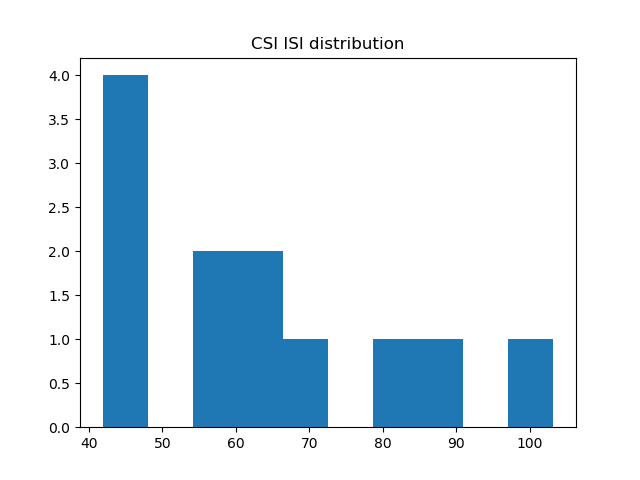

<IPython.core.display.Javascript object>


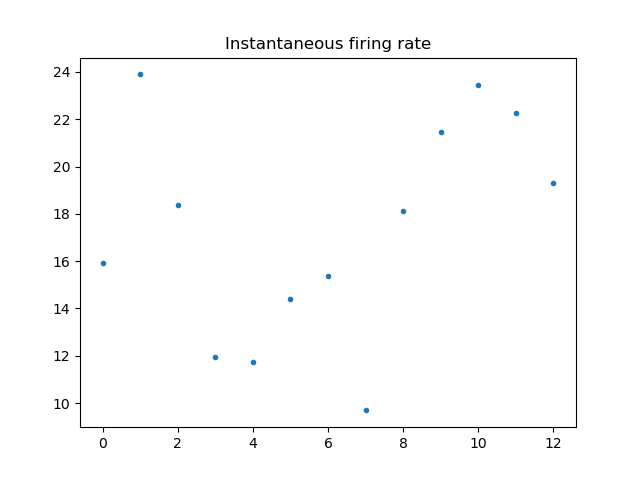

<IPython.core.display.Javascript object>


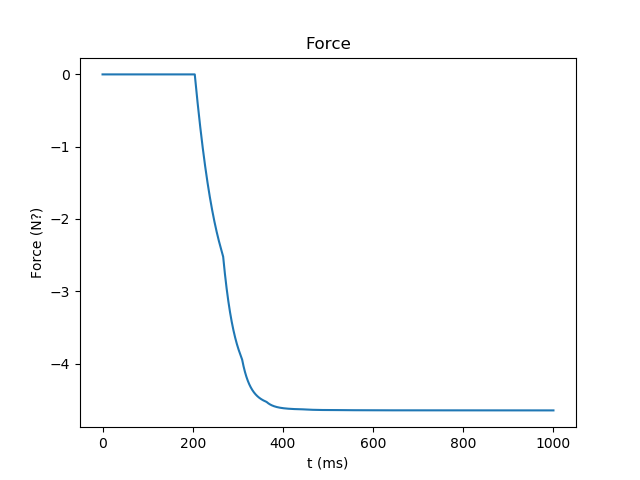

<IPython.core.display.Javascript object>


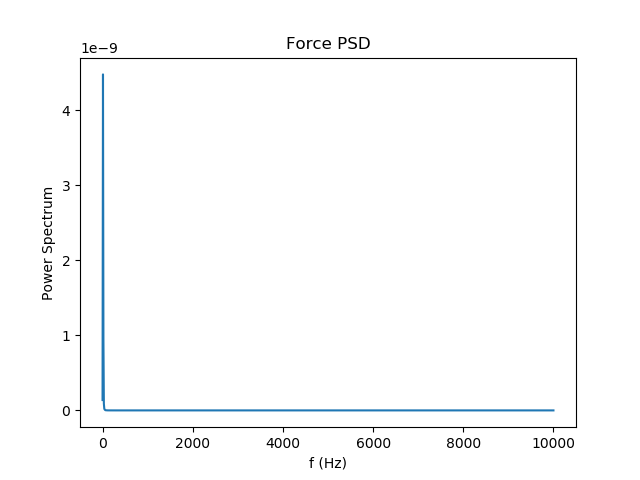

<IPython.core.display.Javascript object>


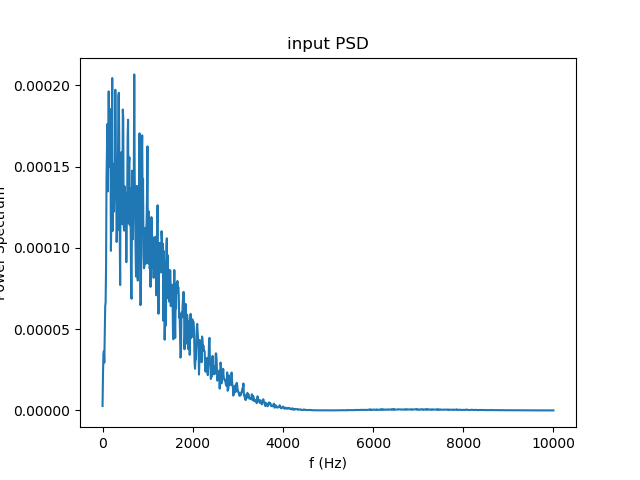

<IPython.core.display.Javascript object>


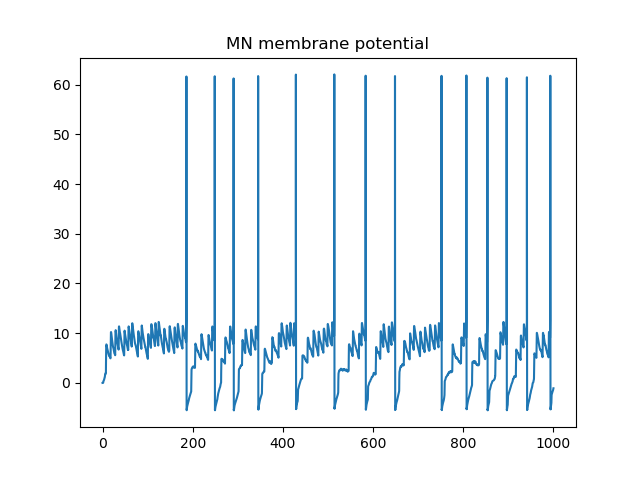

<IPython.core.display.Javascript object>


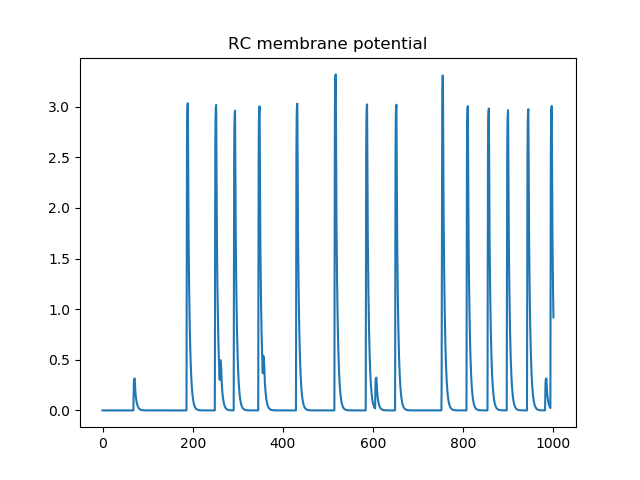

<IPython.core.display.Javascript object>


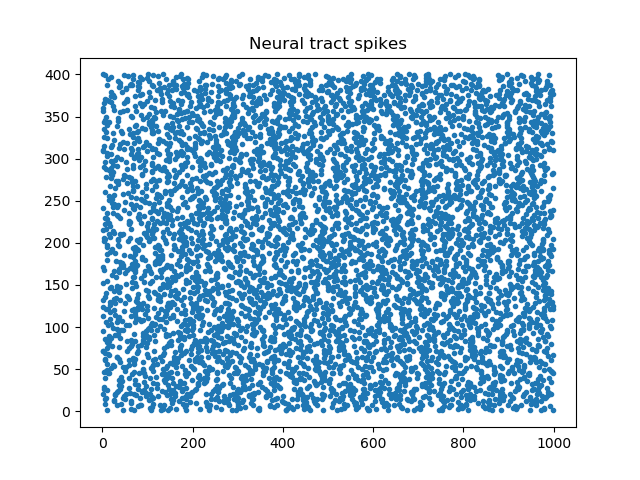

<IPython.core.display.Javascript object>


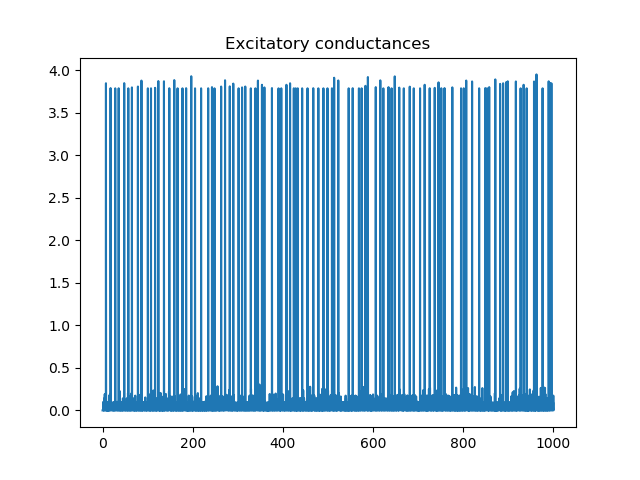

Mean conductance 0.12171326936553471


<IPython.core.display.Javascript object>


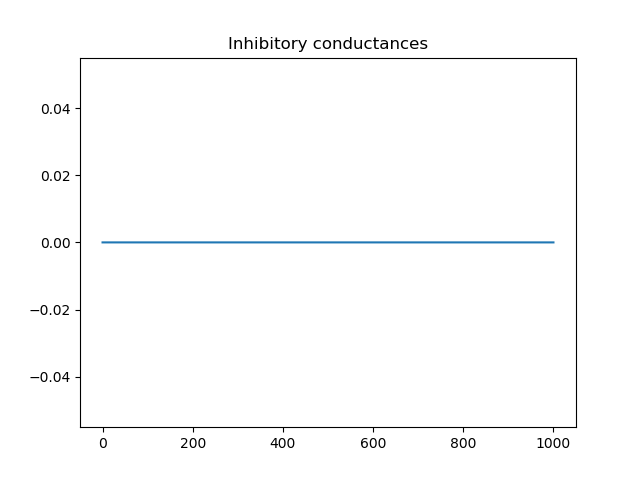

55.054090023 seconds


In [79]:
tic = time.time()
instFR = simulator(nCM, nS, nFR, nFF, nRC, params, declinefactor_MN, declinefactor_RC, MNposition, RCposition, gmaxFF)
toc = time.time()
print str(toc - tic) + ' seconds'